C:\Users\mickm\AppData\Local\Temp\ipykernel_7724\2312802139.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  HRPlot.show()


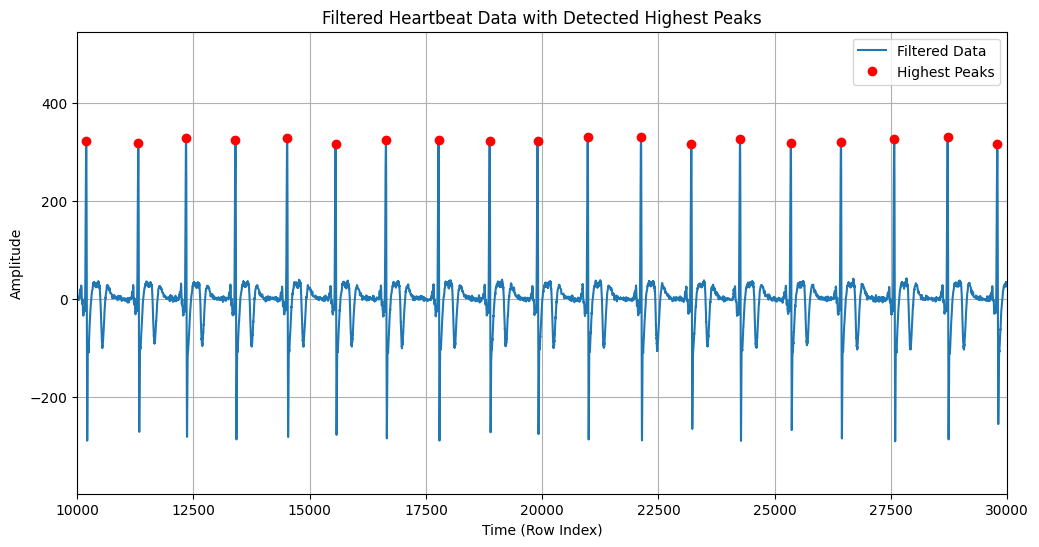

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor, Button
from scipy import signal
import math


file_path = "data\Research_B\Data\F(N24)V.txt"

highest_peak_values = []
highest_peak_indices = []

data = []
RMSSD = []

with open(file_path, 'r') as file:
    data_started = False
    for line in file:
        # Check if the line contains data
        if data_started:
            values = line.strip().split()
            data.append([int(val) for val in values])
        elif line.strip() == "# EndOfHeader":
            data_started = True

# Convert the data into a NumPy array
data = np.array(data)

heartbeat_data = data[:, 2]

#Toggle inverse heartbeatdata
if False:
    heartbeat_data = -heartbeat_data

heightthreshold = 175  # Adjust this threshold as needed
widthtreshold = 200


#Butterworth filter
sos = signal.butter(2, 3, 'highpass',fs = 1000, output = 'sos')
filtered = signal.sosfilt(sos, heartbeat_data)

# Create an array for the x-axis (time)
time = np.arange(len(heartbeat_data))

peaks, _ = signal.find_peaks(filtered, height=heightthreshold, distance= widthtreshold)

# Plot the original data
HRPlot = plt.figure(figsize=(12, 6))
plt.plot(time, filtered, label='Filtered Data')

# Plot the detected highest peaks on the original data
plt.plot(peaks, filtered[peaks], 'ro', label='Highest Peaks')
plt.xlabel('Time (Row Index)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Filtered Heartbeat Data with Detected Highest Peaks')
plt.grid(True)
plt.xlim(10000,30000)
# Show the plot
HRPlot.show()

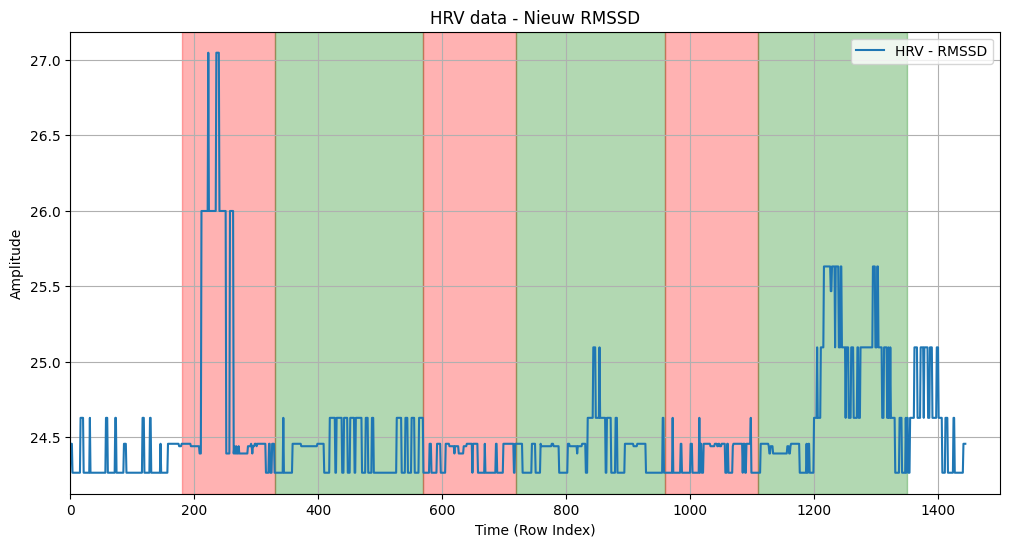

In [26]:
#--------------------- Nieuwe berekening -------------------------
from matplotlib.lines import Line2D
interval = 29000  # Meettijd per HRV waarde (ms)
All_HRV = []

def calculate_rmssd(heartbeat_data, peaks):
    HRVRMSSD = []
    waarde1 = 0
    waarde2 = interval

    for i in range(int((len(heartbeat_data) - interval) / 1000)):
        peaks_in_range_interval = [peak for peak in peaks if waarde1 <= peak <= waarde2]
        squared_differences = [(heartbeat_data[peaks[i+1]] - heartbeat_data[peaks[i]]) ** 2 for i in range(len(peaks_in_range_interval)-1)]
        mean_squared_diff = sum(squared_differences) / (len(peaks_in_range_interval) - 1)
        rmssd_value = math.sqrt(mean_squared_diff)
        HRVRMSSD.append(rmssd_value)
        waarde1 += 1000
        waarde2 += 1000

    return HRVRMSSD

# Voer de functie uit om HRVRMSSD te berekenen
HRVRMSSD = calculate_rmssd(heartbeat_data, peaks)

# Plot de HRV data met de RMSSD formule
# Maak een figuur en as-object
fig, ax = plt.subplots(figsize=(12, 6))

# Voeg de lijnplot toe aan de as
ax.plot(HRVRMSSD, label='HRV - RMSSD')

# Stel de titel en labels in
ax.set_xlabel('Time (Row Index)')
ax.set_ylabel('Amplitude')
ax.set_title('HRV data - Nieuw RMSSD')

# Voeg een raster en een legenda toe
ax.grid(True)
ax.legend()

ax.set_xlim(0, 1500)

ax.axvspan(180, 330, color="red", alpha=0.3)
ax.axvspan(330, 570, color="green", alpha=0.3)
ax.axvspan(570, 720, color="red", alpha=0.3)
ax.axvspan(720, 960, color="green", alpha=0.3)
ax.axvspan(960, 1110, color="red", alpha=0.3)
ax.axvspan(1110, 1350, color="green", alpha=0.3)
ax.legend()

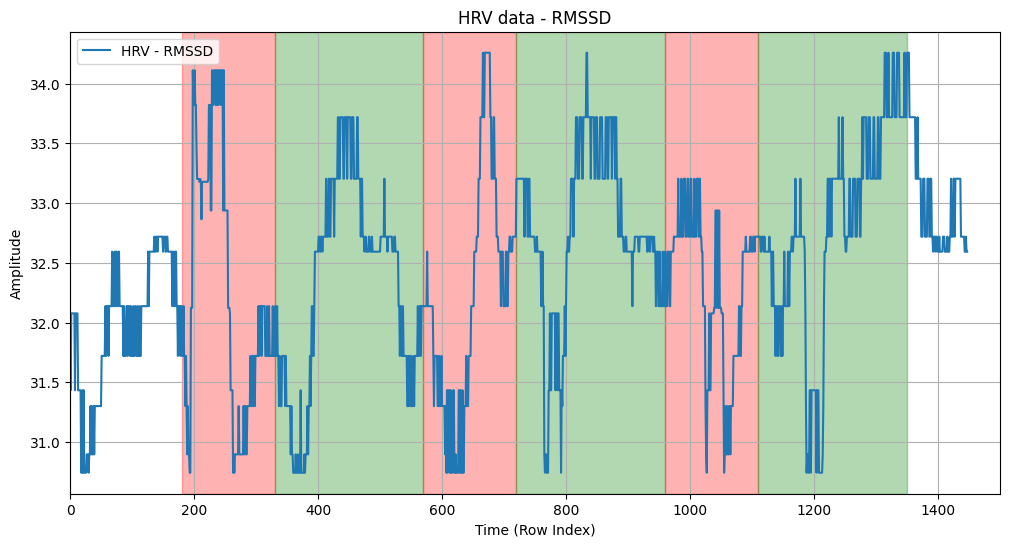

In [21]:
interval = 30000 #Meettijd per HRV waarde (ms)

#Calculate HRV with RMSSD
All_HRV2 = []
def calculate_rmssd2(heartbeat_data, peaks):

    HRVRMSSD2 = []
    waarde1 = 0
    waarde2 = interval
    RMSSD2 = []

    for i in range(int((len(heartbeat_data) - interval) / 1000)):
        peaks_in_range = [peak for peak in peaks if waarde1 <= peak <= waarde2]
        
        # Neem de kwadraten van de verschillen tussen de pieken
        squared_differences = [(heartbeat_data[peaks_in_range[i+1]] - heartbeat_data[peaks_in_range[i]]) ** 2 for i in range(len(peaks_in_range)-1)]

        # Bereken de RMSSD-waarde voor dit interval
        rmssd_value = math.sqrt(sum(squared_differences) / (len(peaks_in_range) - 1))
        HRVRMSSD2.append(rmssd_value)

        # Verschuif het tijdvenster met 1 seconde (1000 ms)
        waarde1 += 1000
        waarde2 += 1000

    return HRVRMSSD2

HRVRMSSD2 = calculate_rmssd2(heartbeat_data, peaks)
#plot de HRV data met de RMSSD formule
# Maak een figuur en as-object
fig, ax = plt.subplots(figsize=(12, 6))

# Voeg de lijnplot toe aan de as
ax.plot(HRVRMSSD, label='HRV - RMSSD')

# Stel de titel en labels in
ax.set_xlabel('Time (Row Index)')
ax.set_ylabel('Amplitude')
ax.set_title('HRV data - RMSSD')

# Voeg een raster en een legenda toe
ax.grid(True)
ax.legend()

ax.set_xlim(0, 1500)

ax.axvspan(180, 330, color="red", alpha=0.3)
ax.axvspan(330, 570, color="green", alpha=0.3)
ax.axvspan(570, 720, color="red", alpha=0.3)
ax.axvspan(720, 960, color="green", alpha=0.3)
ax.axvspan(960, 1110, color="red", alpha=0.3)
ax.axvspan(1110, 1350, color="green", alpha=0.3)

plt.show()

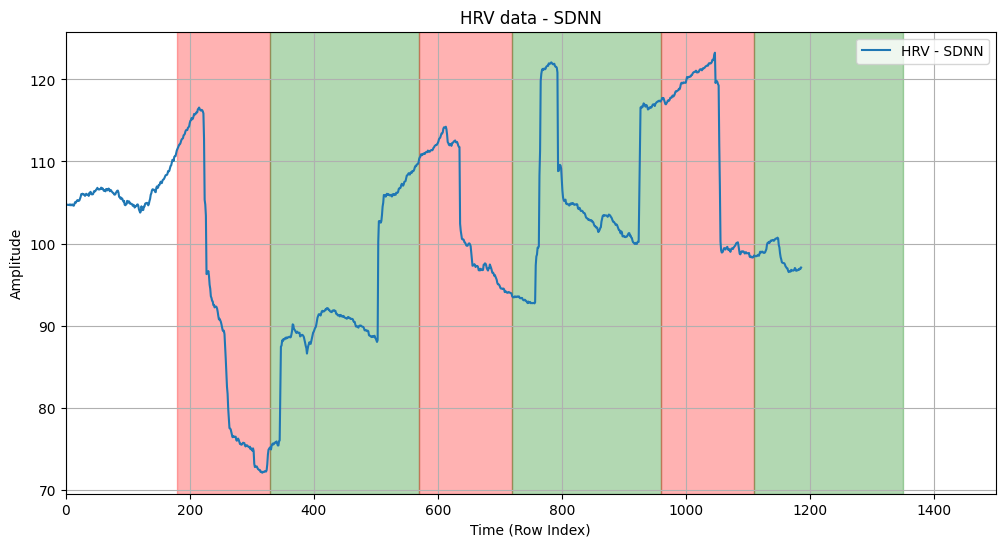

In [22]:
#Calculate HRV with SDNN


interval = 290000  # Meetinterval per HRV-waarde (ms), bijvoorbeeld 5 minuten
All_HRV3 = []

def calculate_sdnn(heartbeat_data, peaks):
    HRVSDNN = []
    waarde1 = 0
    waarde2 = interval

    for i in range(int((len(heartbeat_data) - interval) / 1000)):
        peaks_in_range_interval = [peak for peak in peaks if waarde1 <= peak <= waarde2]
        
        # Bereken de NN-intervallen (tijdsverschillen tussen opeenvolgende pieken)
        nn_intervals = [peaks_in_range_interval[j+1] - peaks_in_range_interval[j] for j in range(len(peaks_in_range_interval)-1)]

        # Bereken het gemiddelde van de NN-intervallen
        mean_nn_interval = sum(nn_intervals) / len(nn_intervals)

        # Bereken de standaardafwijking van de NN-intervallen
        sdnn_value = math.sqrt(sum([(interval - mean_nn_interval) ** 2 for interval in nn_intervals]) / (len(nn_intervals) - 1))
        HRVSDNN.append(sdnn_value)

        waarde1 += 1000
        waarde2 += 1000

    return HRVSDNN

# Voer de functie uit om SDNN-waarden te berekenen
HRVSDNN = calculate_sdnn(heartbeat_data, peaks)

# Maak een figuur en as-object
fig, ax = plt.subplots(figsize=(12, 6))

# Voeg de lijnplot toe aan de as
ax.plot(HRVSDNN, label='HRV - SDNN')

# Stel de titel en labels in
ax.set_xlabel('Time (Row Index)')
ax.set_ylabel('Amplitude')
ax.set_title('HRV data - SDNN')

# Voeg een raster en een legenda toe
ax.grid(True)
ax.legend()

ax.set_xlim(0, 1500)

ax.axvspan(180, 330, color="red", alpha=0.3)
ax.axvspan(330, 570, color="green", alpha=0.3)
ax.axvspan(570, 720, color="red", alpha=0.3)
ax.axvspan(720, 960, color="green", alpha=0.3)
ax.axvspan(960, 1110, color="red", alpha=0.3)
ax.axvspan(1110, 1350, color="green", alpha=0.3)

plt.show()